In [1]:
# import
import torch
# import numpy as np
import matplotlib.pyplot as plt

# plt settings
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
def initialize(segment):
    x_vec = torch.linspace(-torch.pi, torch.pi, segment)
    p_vec = torch.randn(segment) * 0.1
    p_vec.requires_grad = True
    return p_vec

In [3]:
# # for debug 
# fig, ax = plt.subplots()
# ax.plot(x_vec)
# print(p_vec)

In [4]:
def exp_then_FT(p_vec):
    """exp p_vec to get modulated field, then do FFT to get coefficience of each order

    Args:
        p_vec (tenser): phase of the gating indroduce

    Returns:
        tenser: fourier coefficiency, shape of p_vec
    """

    exp_p = torch.exp(1j * p_vec) # p_vec do not need to use torch.complex64
    # question: if p_vec use torch.complex64, will autograd compute imagine part
    # return exp_p
    return torch.fft.fft(exp_p)/len(exp_p)

In [5]:
# # test exp_then_FT
# # coefficience = exp_then_FT(-1j * torch.log(torch.cos(x_vec) + 2), x_vec)
# # coefficience = exp_then_FT(x_vec, x_vec)
# # coefficience = exp_then_FT(p_vec, x_vec)
# coefficience = exp_then_FT(torch.randn(10000))

# plt.stem(torch.abs(coefficience).detach().numpy())
# # test energy conserve 
# frequency_energy = torch.sum(torch.abs(coefficience) ** 2).item()
# phase_energy = torch.sum(torch.abs(torch.exp(p_vec)) ** 2).item()
# print("energy of frequncy domain", frequency_energy)
# print("energy of phase domain", phase_energy)

# print("coefficience 0: ", coefficience[0])
# print("coefficience -1: ", coefficience[-1])
# print("coefficience 1: ", coefficience[1])


In [6]:
def forward(p_vec: torch.tensor, alpha=0.5):
    # return loss
    loss = 0

    coefficient = exp_then_FT(p_vec)
    total_energy = 1 # phase domian magnitude is all 1, energy conserve
    minus1_energy = torch.abs(coefficient[-1])**2  
    plus1_energy = torch.abs(coefficient[1])**2  
    want_energy = minus1_energy + plus1_energy
    energy_efficiency = want_energy / total_energy
    
    loss += (alpha) * (1 - energy_efficiency)
    loss += (1 - alpha) * torch.abs(minus1_energy - plus1_energy)
    
    return loss
    

In [7]:
# # test forward
# random_vec = torch.randn(10000)
# loss = forward(random_vec).item()
# print("loss", loss)
# coefficience = exp_then_FT(random_vec)

# plt.stem(torch.abs(coefficience).detach().numpy())
# # test energy conserve 
# frequency_energy = torch.sum(torch.abs(coefficience) ** 2).item()
# phase_energy = torch.sum(torch.abs(torch.exp(p_vec)) ** 2).item()
# print("energy of frequncy domain", frequency_energy)
# print("energy of phase domain", phase_energy)

# print("coefficience 0: ", coefficience[0])
# print("coefficience -1: ", coefficience[-1])
# print("coefficience 1: ", coefficience[1])

In [8]:
def visualize(p_vec):

    coefficience = exp_then_FT(p_vec)

    plt.subplot(1, 2, 1)
    plt.stem(p_vec.detach().numpy())

    plt.subplot(1, 2, 2)
    plt.stem(torch.abs(coefficience).detach().numpy())
    # test energy conserve 
    frequency_energy = torch.sum(torch.abs(coefficience) ** 2).item()
    phase_energy = torch.sum(torch.abs(torch.exp(p_vec)) ** 2).item()
    print("energy of frequncy domain", frequency_energy)
    print("energy of phase domain", phase_energy)

    print("coefficience 0: ", coefficience[0])
    print("coefficience -1: ", coefficience[-1])
    print("coefficience 1: ", coefficience[1])


In [13]:
def train(epoches, learning_rate, alpha=0.5, segment=10000):
    p_vec = initialize(segment)
    for epoch in range(epoches):
        loss = forward(p_vec, alpha)
        loss.backward()
        with torch.no_grad():
            # print("initial", p_vec)
            # print("changed", learning_rate* p_vec.grad)
            p_vec -= learning_rate * p_vec.grad
            p_vec.grad.zero_()
            # print("last", p_vec)
        print('Epoch:', epoch, 'Loss:', loss.item())
        
    return p_vec

In [22]:
p_vec = train(
    1000,
    1e2,
    0.5, 
    10000,
)

Epoch: 0 Loss: 0.4999997317790985
Epoch: 1 Loss: 0.4999997317790985
Epoch: 2 Loss: 0.4999997317790985
Epoch: 3 Loss: 0.4999997019767761
Epoch: 4 Loss: 0.4999997019767761
Epoch: 5 Loss: 0.4999997019767761
Epoch: 6 Loss: 0.4999997019767761
Epoch: 7 Loss: 0.49999967217445374
Epoch: 8 Loss: 0.4999997019767761
Epoch: 9 Loss: 0.4999997019767761
Epoch: 10 Loss: 0.4999997019767761
Epoch: 11 Loss: 0.49999967217445374
Epoch: 12 Loss: 0.49999967217445374
Epoch: 13 Loss: 0.49999967217445374
Epoch: 14 Loss: 0.49999967217445374
Epoch: 15 Loss: 0.49999964237213135
Epoch: 16 Loss: 0.49999964237213135
Epoch: 17 Loss: 0.49999964237213135
Epoch: 18 Loss: 0.49999964237213135
Epoch: 19 Loss: 0.49999961256980896
Epoch: 20 Loss: 0.49999961256980896
Epoch: 21 Loss: 0.49999961256980896
Epoch: 22 Loss: 0.4999995827674866
Epoch: 23 Loss: 0.4999995827674866
Epoch: 24 Loss: 0.4999995827674866
Epoch: 25 Loss: 0.4999995529651642
Epoch: 26 Loss: 0.4999995529651642
Epoch: 27 Loss: 0.4999995529651642
Epoch: 28 Loss: 0.

energy of frequncy domain 1.0000001192092896
energy of phase domain 79097.921875
coefficience 0:  tensor(0.2534-0.0004j, grad_fn=<SelectBackward0>)
coefficience -1:  tensor(0.5147-0.3435j, grad_fn=<SelectBackward0>)
coefficience 1:  tensor(-0.5190-0.3454j, grad_fn=<SelectBackward0>)


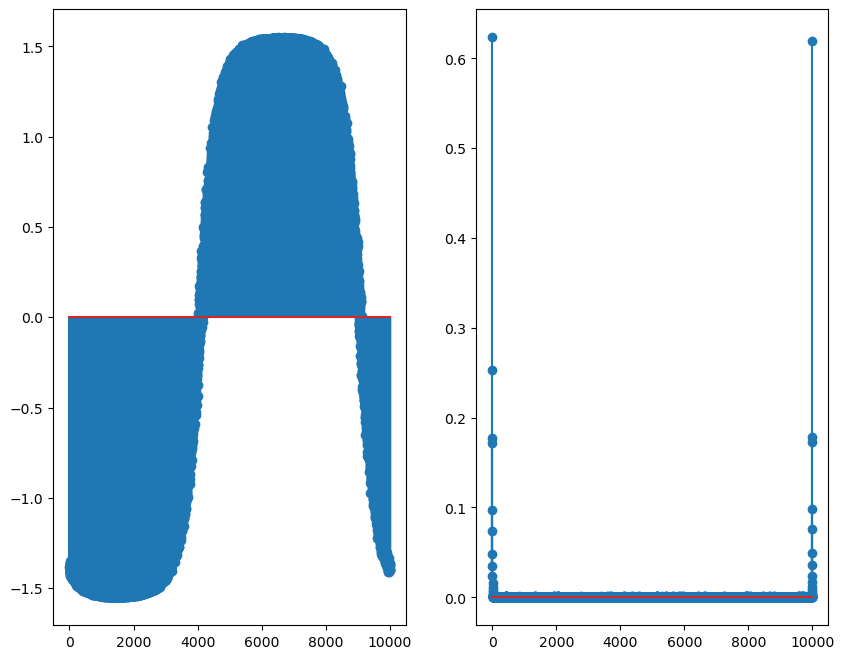

In [23]:
visualize(p_vec)